In [ ]:
%pip install pandas
%pip install numpy

In [ ]:
%pip install category_encoders

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from category_encoders import OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

In [4]:
df = pd.read_csv('C:/Users/ASUS/Section3/Section3_project/DATA/diabetes.csv')

In [5]:
df.shape

(768, 9)

In [6]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
df = df.drop("SkinThickness", axis="columns")

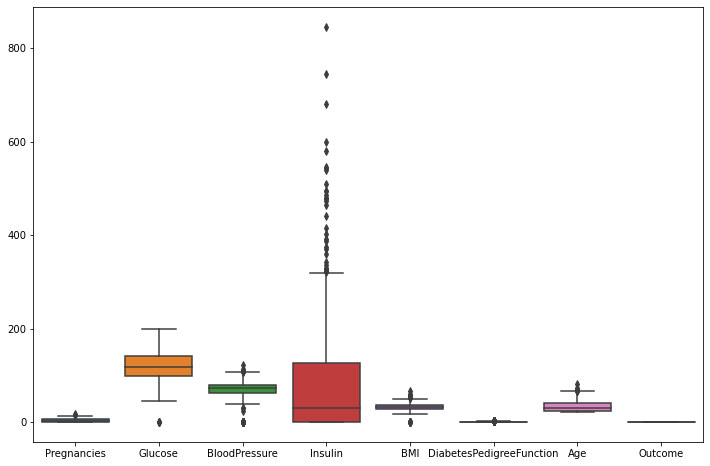

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,8))
sns.boxplot(data=df)
plt.show()

In [9]:
df['Glucose'] = np.where(df['Glucose']==0, df['Glucose'].mean(), df['Glucose'])
df['BloodPressure'] = np.where(df['BloodPressure']==0, df['BloodPressure'].mean(), df['BloodPressure'])
df['Insulin'] = np.where(df['Insulin']==0, df['Insulin'].mean(), df['Insulin'])
df['BMI'] = np.where(df['BMI']==0, df['BMI'].mean(), df['BMI'])

In [10]:
target = ['Outcome']
features = ['Pregnancies', 'Glucose', 'BloodPressure', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

In [11]:
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
print(X_train.shape)
print(X_test.shape)

(614, 7)
(154, 7)


In [13]:
from scipy.stats import randint
n_estimators = randint(200,2000,50)
max_features = ['auto', 'sqrt','log2']
max_depth = randint(3, 10)
min_samples_split = [5,10,15]
min_samples_leaf = [1,2,4,6,8]
random = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['gini']}

In [14]:
rf = RandomForestClassifier()
rf_randomcv = RandomizedSearchCV(estimator=rf,param_distributions=random,n_iter=100,cv=3,verbose=2,
                               random_state=100,n_jobs=-1)
rf_randomcv.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


c:\Users\ASUS\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini'],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000267FAB315E0>,
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [5, 10, 15],
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000267F271AC10>},
                   random_state=100, verbose=2)

In [15]:
rf_randomcv.best_params_

{'criterion': 'gini',
 'max_depth': 7,
 'max_features': 'auto',
 'min_samples_leaf': 4,
 'min_samples_split': 15,
 'n_estimators': 1102}

In [16]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
RandomForest = RandomForestClassifier(criterion='gini', n_estimators=1405, max_depth=8, max_features='sqrt', min_samples_split=6, min_samples_leaf=5)
RandomForest = RandomForest.fit(X_train,y_train)

# Prediction
y_pred = RandomForest.predict(X_test)

# accuracy_score
print('Accuracy:', accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

C:\Users\ASUS\AppData\Local\Temp\ipykernel_25624\440111541.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandomForest = RandomForest.fit(X_train,y_train)


Accuracy: 0.7662337662337663
[[82 17]
 [19 36]]
              precision    recall  f1-score   support

           0       0.81      0.83      0.82        99
           1       0.68      0.65      0.67        55

    accuracy                           0.77       154
   macro avg       0.75      0.74      0.74       154
weighted avg       0.76      0.77      0.77       154



In [17]:
import pickle
filename = 'diabetes.pkl'
pickle.dump(RandomForest, open(filename, 'wb'))

In [18]:
#저장한 모델 불러와서 테스트 진행

model = None
with open('diabetes.pkl','rb') as pickle_file:
    model = pickle.load(pickle_file)

In [29]:
data1 = 0
data2 = 80
data3 = 80
data4 = 30
data5 = 33.6
data6 = 0.4
data7 = 50

arr = np.array([[data1, data2, data3, data4, data5, data6, data7]])

In [30]:
test = pd.DataFrame(arr, columns=['Pregnancies','Glucose','BloodPressure','Insulin','BMI','DiabetesPedigreeFunction','Age'])
test

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.0,80.0,80.0,30.0,33.6,0.4,50.0


In [31]:
pred = model.predict(test)

In [32]:
int(pred)

0